<a href="https://colab.research.google.com/github/vifirsanova/nlp-course/blob/main/tutorial_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Сверточная нейросеть (Convolutional Neural Network)

**Мотивация**:

Допустим, мы хотим создать систему распознавания изображений для автоматического определения категорий товаров в онлайн-маркете

Чтобы произвести классификацию товаров (дискриминационное машинное обучение), можно выделить наиболее яркие признаки на изображениях, т.е. сделать их более контрастными

Как выделить контрастные признаки?


**Интуиция**:

Например, можно наложить фильтр, которые темные оттенки сделает темнее, а светлые - светлее

**Техническое решение**:

Применить операцию свертки к матрицам, кодирующим изображения

**Сферы применения сверточных нейросетей**

- задачи на классификацию
- обработка, колоризация изображения
- сентимент-анализ, PoS-tagging

Вопрос: для каких задач подойдет / не подойдет сверточная нейросеть?

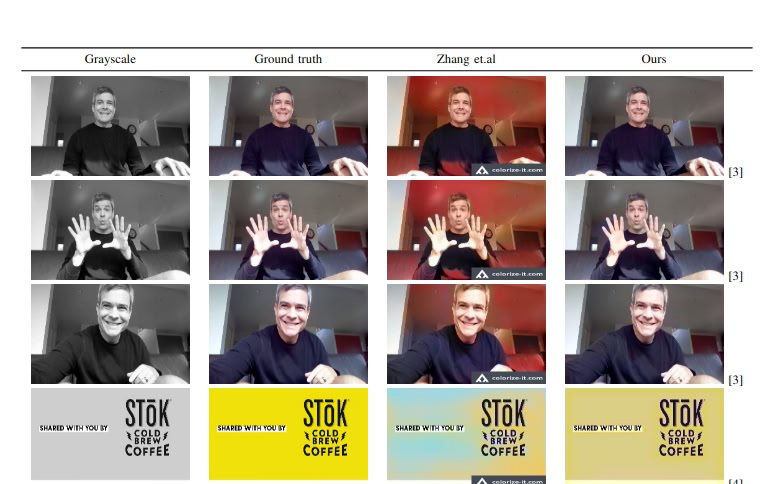

https://arxiv.org/pdf/1812.03858

### Операция свертки

1. **Input Matrix**:

  - закодированные входные данные, например, изображение рукописной цифы размером 128x128 пикселей из датасета MNIST

2. **Ядро (Kernel/Filter)**:

  - небольшая матрица, например, 3x3 или 5x5
  - содержит значения, которые перемножаются на значения входной матрицы
  - ядро проходится (скользит) по входной матрице, чтобы получить новые значения, т.е. отфильтровать изображение
  - значения, составляющие матрицу-ядро настраиваются в процессе обучения
  - обычно они различаются на каждом слое обучения, т.к. это получается захватить признаки изображения с разных "перспектив"

3. **Скользящее окно (Sliding Window)**

  - алгоритм: так ядро проходится по исходной матрице и выполняется свертка
  - используется покомпонентное матричное умножение (element-wise)
  - результат: сумма вычислений

4. **Output Matrix (Feature Map)**:

  - результат вычислений, новая матрица, которая отражает вычисленные признаки


#### Низкоуровневый пример

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolve2d(image, kernel):
    # Вычисляем размерность входной матрицы (размер изображения)
    image_height, image_width = image.shape
    # Вычисляем размерность матрицы ядра
    kernel_height, kernel_width = kernel.shape

    # Вычисляем размерность выдной матрицы
    output_height = image_height - kernel_height + 1 # Высота матрицы
    output_width = image_width - kernel_width + 1 # Ширина матрицы

    # Создаем "болванку" для выходной матрицы вычисленной размерности
    # Популируем матрицу нулями
    output = np.zeros((output_height, output_width))

    # Операция свертки
    # Для каждого компонента матрицы по высоте
    for i in range(output_height):
        # Для каждого компонента матрицы по ширине
        for j in range(output_width):
            # Значение компонента одной ячейки матрицы (пересечение высоты и ширины)
            # Значение вычисляем как сумму текущего компонента входной матрицы
            # Текущий компонент - это ячейка из одного или нескольких чисел в диапазоне размера ядра
            # Производим element-wise / покомпонентное умножение ячейки матрицы в размере ядра на непосредственно ядро
            output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output

Применяем функции к тестовым значениям

In [ ]:
# Тестовое изображение (число обозначает насыщенность цвета)
image = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])
# Тестовое ядро
kernel = np.array([[1, 0],
                   [0, -1]])

# Производим свертку
output = convolve2d(image, kernel)

Визуализируем результат

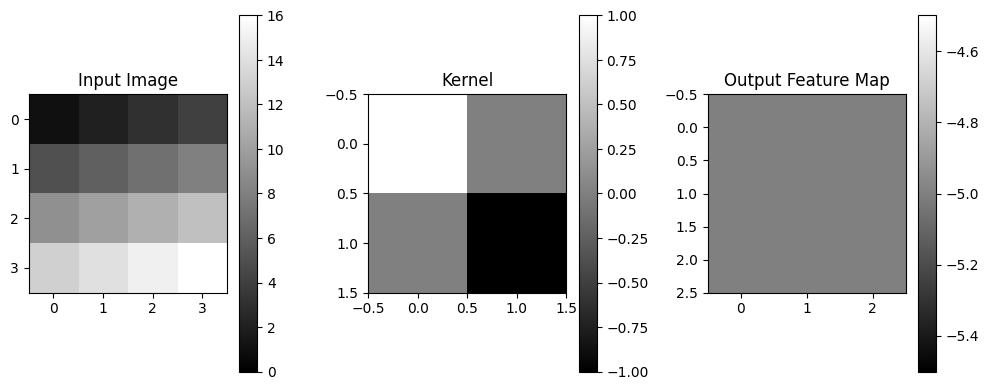

In [ ]:
# Визуализация
plt.figure(figsize=(10, 4))

# Производим мэппинг числовых значений на оттенки серого
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image, cmap='gray', vmin=0, vmax=16)
plt.colorbar()

# Отрисовка ядра
plt.subplot(1, 3, 2)
plt.title("Kernel")
plt.imshow(kernel, cmap='gray', vmin=-1, vmax=1)
plt.colorbar()

# Отрисовка выходной матрицы: здесь нам удалось выявить "среднестатистический", наиболее репрезентативный или преобладающий цвет
plt.subplot(1, 3, 3)
plt.title("Output Feature Map")
plt.imshow(output, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

#### Пример использования свертки в обработке изображений

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

# Подгружае тестовое изображение
image = Image.open("/content/pug-dog-breed.jpeg").convert("L")  # Режим "L" преобразовывает изображение к виду оттенков серого
image = np.array(image)  # Создаем числовое представление изображения

Задаем значения для обработки изображения

In [ ]:
# Задаем матрицы ядер
# Ядро для определения углов
kernel_edge = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# Ядро для размытия
kernel_blur = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]])

# Ядро для повышения резкости
kernel_sharpen = np.array([[ 0, -1,  0],
                          [-1,  5, -1],
                          [ 0, -1,  0]])

Применяем свертку

In [ ]:
# Создаем три варианта выходных матриц
# Здесь мы используем готовый метод convolve
# Найдите документацию метода в scipy, чтобы ответить на вопрос, что значат аргументы mode и cval
output_edge = convolve(image, kernel_edge, mode='constant', cval=0.0)
output_blur = convolve(image, kernel_blur, mode='constant', cval=0.0)
output_sharpen = convolve(image, kernel_sharpen, mode='constant', cval=0.0)

Визуализация

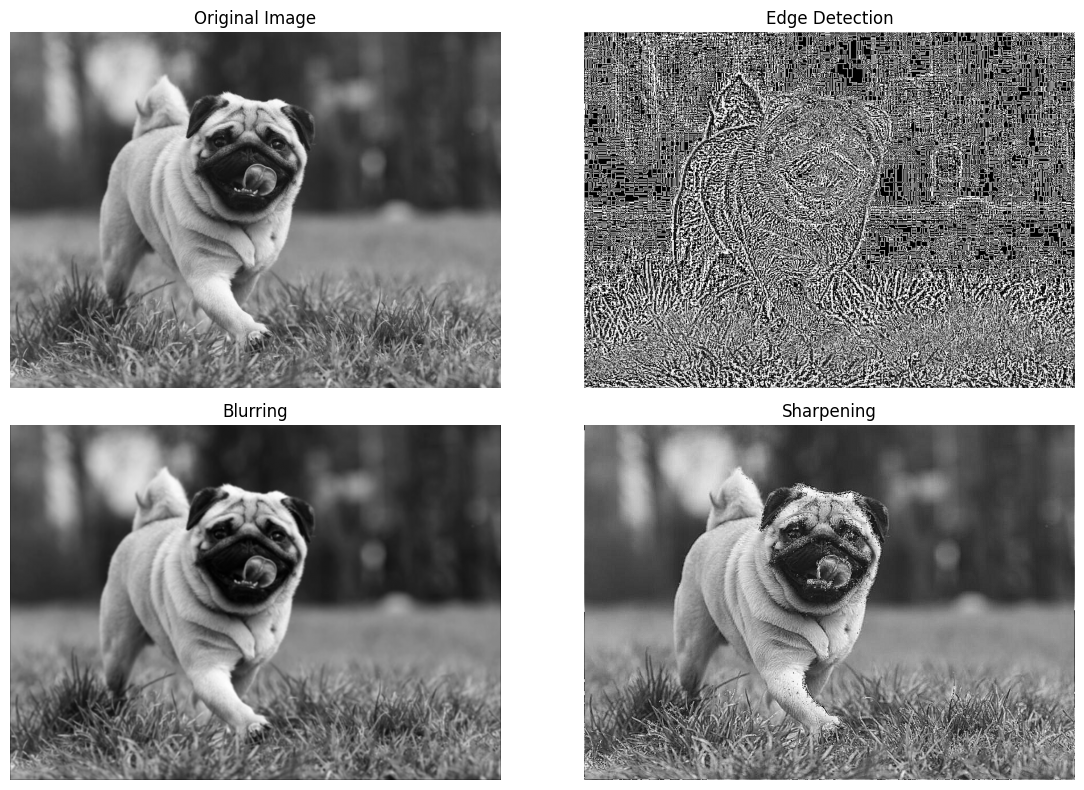

In [ ]:
# Задаем изображение
plt.figure(figsize=(12, 8))

# Исходное изображение
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Выделение краев
plt.subplot(2, 2, 2)
plt.title("Edge Detection")
plt.imshow(output_edge, cmap='gray')
plt.axis('off')

# Блур
plt.subplot(2, 2, 3)
plt.title("Blurring")
plt.imshow(output_blur, cmap='gray')
plt.axis('off')

# Резкость
plt.subplot(2, 2, 4)
plt.title("Sharpening")
plt.imshow(output_sharpen, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


#### Обучение модели

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9070 - loss: 0.2982 - val_accuracy: 0.9870 - val_loss: 0.0407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9872 - loss: 0.0434 - val_accuracy: 0.9905 - val_loss: 0.0302
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9906 - val_loss: 0.0287
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.9943 - loss: 0.0193 - val_accuracy: 0.9909 - val_loss: 0.0296
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9954 - loss: 0.0141 - val_accuracy: 0.9903 - val_loss: 0.0327
313/313 - 2s - 7ms/step - accuracy: 0.9903 - loss: 0.0327
Test accuracy: 0.9903


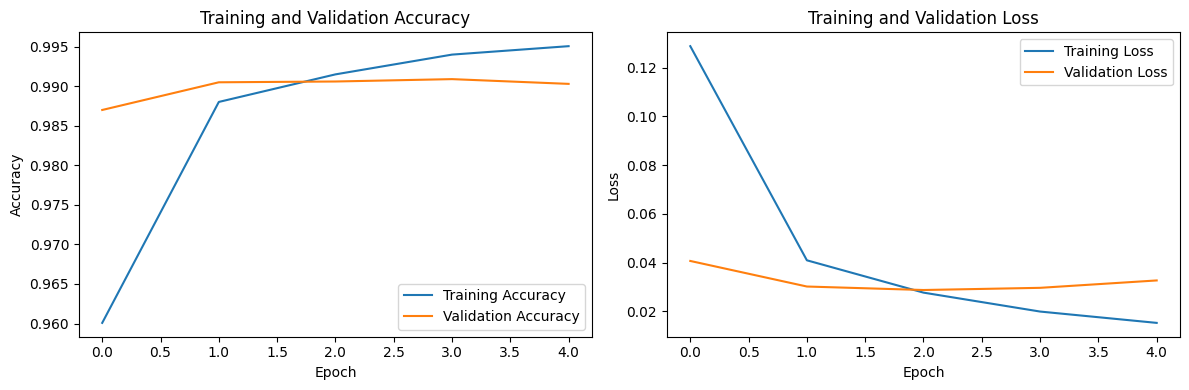

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Загружаем MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Препроцессинг
# Регуляризация значений в диапазоне [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Решейпинг: изменение "формы" матрицы
# С помощью документации tf ответьте на вопрос, как работает решейп
# Зачем он применяется в сверточных нейросетях?
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Выстраиваем модель
# С помощью документации tf ответьте на вопрос, почему модель называется Sequential
model = models.Sequential([
    # Первый сверточный слой
    # Что означают значения в скобках Conv2D?
    # Что означают значения в скобках input_shape?
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Что значит пулинг?
    layers.MaxPooling2D((2, 2)),

    # Второй сверточный слой
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Что значит Flatten?
    layers.Flatten(),

    # Почему здесь мы используем 2 функции активации?
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Выходной слой, что означает 10?
])

# Собираем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Оцениваем модель
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Отрисовка графика прогресса обучения
plt.figure(figsize=(12, 4))

# Отрисовка аккуратности (точности) модели
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Отрисовка значений функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Домашнее задание

1. Загрузите датасет для бинарной или многоклассовой классификации:
  - Пример: **обзоры фильмов** с разметкой тональности в формате *.csv

2. Выполните препроцессинг:
  - **Чистка данных** методами NLP (регулярки, удаление стоп-слов и т.д.) и Data Science (удаление пустых строк с помощью `pd.dropna()`)
  - **Токенизация + векторизация** (преобразование текстов к виду числовых представлений), например, с помощью токенизатора TensorFlow/Keras или PyTorch
  - **Паддинг/усечение** (транкейшн) текстовых последовательностей
  - **Разделение датасета** на обучающую, проверочную и тестовую выборки

3. Постройте модель CNN:
  - Добавьте входной слой
  - Добавьте слои свертки и пулинга
  - Настройте размер ядра свертки
  - Добавьте полносвязные слой
  - Настройте функции активации для промежуточных и выходных слоев
  
4. Скомпилируйте модель:
  - Настройте функцию потерь, оптимизатор укажите метрики оценки для валидации модели в процессе обучения

5. Обучите модель:
 - Введите данные в модель
 - Добавьте отслеживание потерь/точности обучения

6. Оцените модель:
 - Проверьте модель на тестовом наборе
 - Вычислите метрики оценки (например, полноту, точность, F1-меру)
 - Выполните визуализацию результатов (например, с помощью матрицы ошибок)

7. Произведите настройку параметров
  - Добавьте комментарии: какие настройки вы изменили и почему? Обоснуйте выбор параметров.

8. Сохраните модель
  - https://www.tensorflow.org/tutorials/keras/save_and_load

9. Базовый уровень:
  - Загрузите результат на гитхаб

  Продвинутый уровень:
  - Попробуйте интегрировать обученную модель в продукт в зависимости от ваших карьерных целей и опыта программирования
  - Примеры интеграции:
  - Мобильное приложение (self-hosted ML model), пример на TFLite: https://blog.tensorflow.org/2021/11/on-device-training-in-tensorflow-lite.html
  - Веб-приложение (запускаем локально), пример на Flask: https://blog.paperspace.com/deploying-deep-learning-models-flask-web-python/

10. Задокументируйте результат: добавьте doc-strings в функции, опишите сферы применения и образец использования модели, сохраните доку в формате *.md, добавьте ее в папку с моделью *.bin и скриптом для обчения модели *.py / *.ipynb

